# Chaining LLMs with `LangChain`

How can we extend the functionality of LLMs in ways other than fine-tuning?
1. Exploiting LLM memory
2. Chains
3. Tools
4. Agents

Some of these will be handled in this notebook and others in ensuing ones.

Generative AI (GAI) has accelerated with the advent of large language models (LLMs). Here is a nice introduction to LLMs that is not technical to get started: https://www.understandingai.org/p/large-language-models-explained-with.

`LangChain` is a library that wraps much of the functionality around using large language models (LLMs) into simple commands that make using LLMs very easy and efficient. The documentation is shown below, along with some useful links.

- Docs: https://python.langchain.com/docs/introduction/; API: https://python.langchain.com/api_reference/

- https://www.mikulskibartosz.name/ai-data-analyst-bot-for-slack-with-gpt-and-langchain/

James Briggs:
1. https://www.youtube.com/watch?v=nE2skSRWTTs&list=PLIUOU7oqGTLge073ctEsETY8XrDI-4Mb8
2. https://www.youtube.com/watch?v=RflBcK0oDH0

LangChain 101: https://www.youtube.com/results?search_query=langchain+101

PineCone's LangChain Manual: https://www.pinecone.io/learn/langchain/

The `LangChain` library helps with calling LLM APIs, prompt construction, chaining prompts, using search in real time as part of its `tools` and `agents` that handle specific types of tasks such as reasoning about how they construct the response.

Alternate libraries similar to LangChain:
- LlamaIndex: https://github.com/jerryjliu/llama_index
- AutoChain: https://github.com/Forethought-Technologies/AutoChain

Below, we install the library for LangChain and also from other providers such as OpenAI (to call gpt-3.5 and da-vinci-003 models). We also install Hugging Face's hub to enable their APIs, and Wolfram Alpha's library to use their APIs. The FAISS library from Meta helps with construction of and retrieval from vector databases that store embeddings from the text of documents used with the LLM. We will also use the [ChromaDB](https://www.trychroma.com) vector database for applications and learn how this is used.

In [1]:
from google.colab import drive
drive.mount('/content/drive')  # Add My Drive/<>

import os
os.chdir('drive/My Drive')
os.chdir('Books_Writings/NLPBook/')

Mounted at /content/drive


In [2]:
%%capture
%pylab inline
import pandas as pd
import os
from IPython.display import Image

In [ ]:
Image('NLP_images/human.png', width=800)

## Compound AI Systems

https://bair.berkeley.edu/blog/2024/02/18/compound-ai-systems/

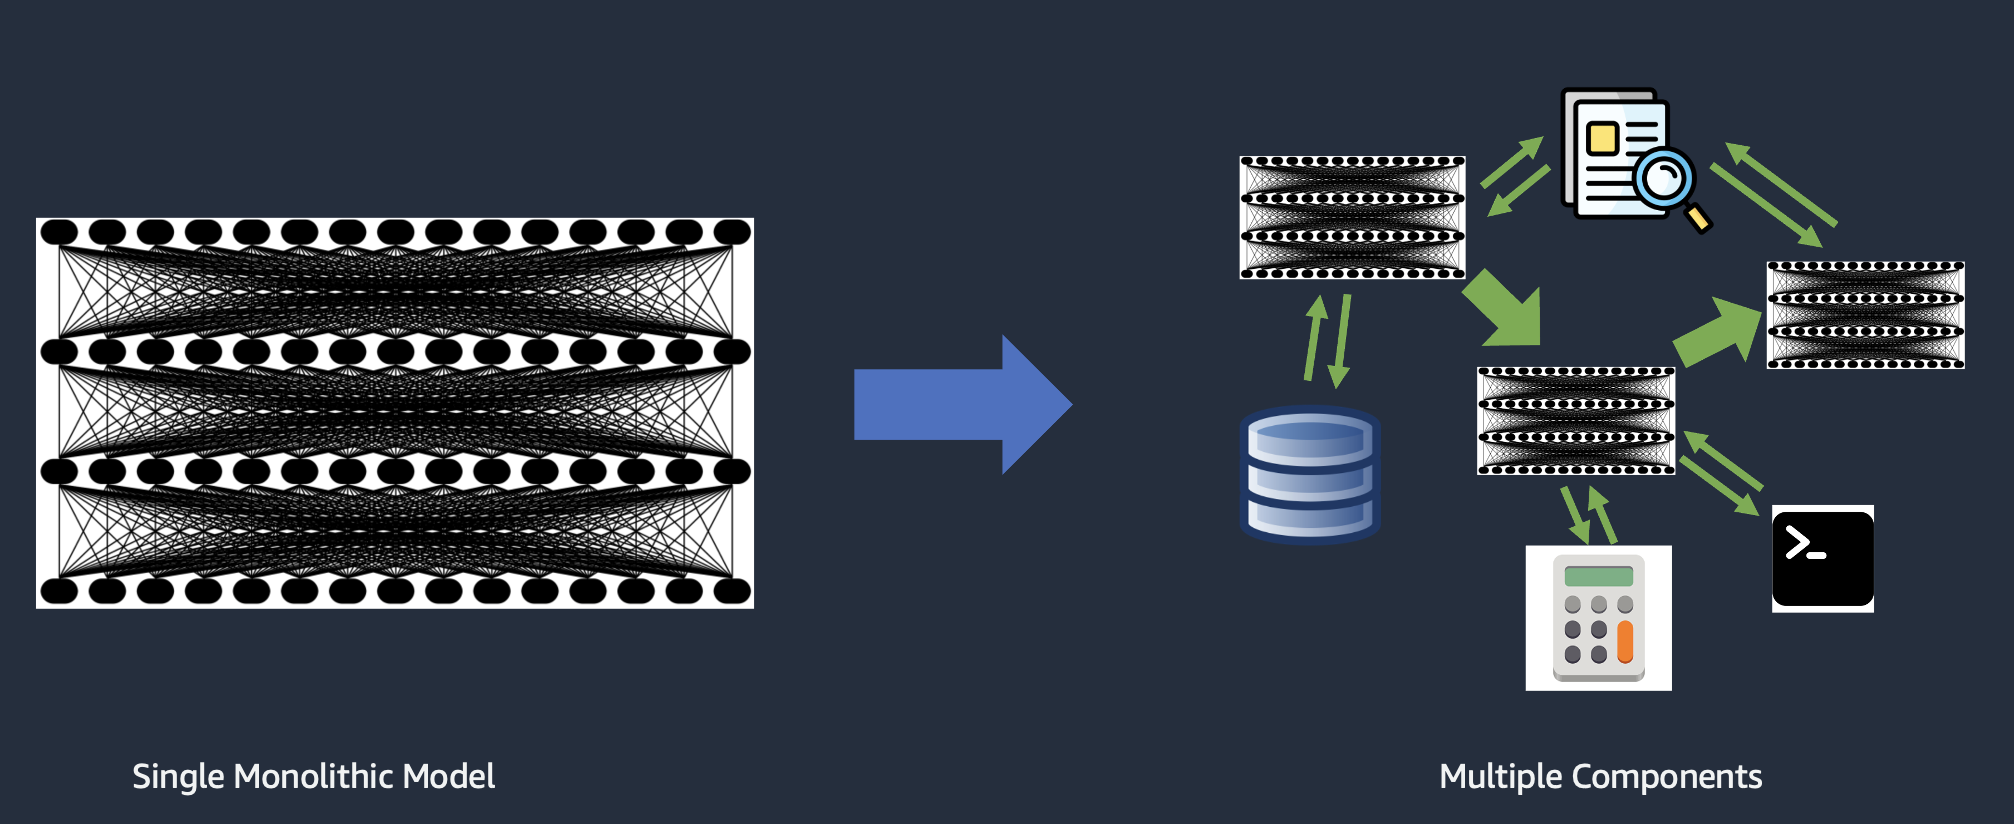

In [ ]:
Image('NLP_images/compound_ai.png', width=800)

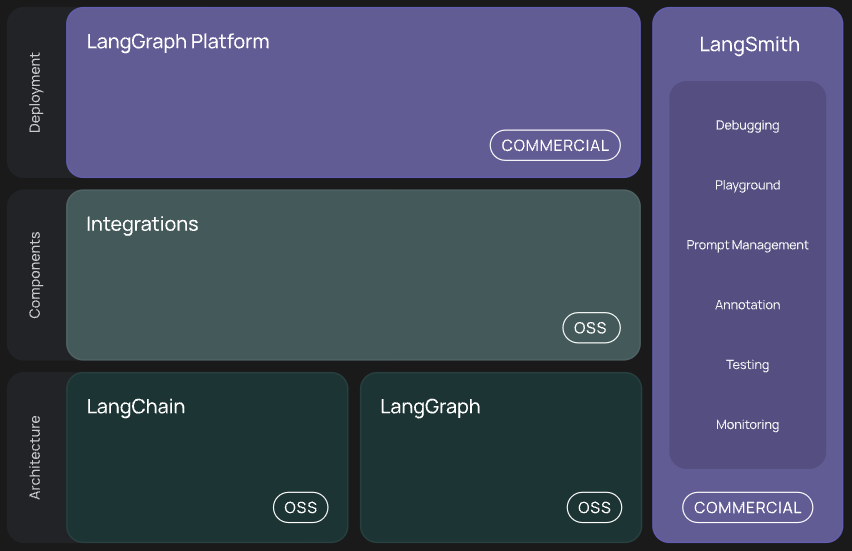

In [ ]:
Image('NLP_images/langchain_stack.png', width=800)

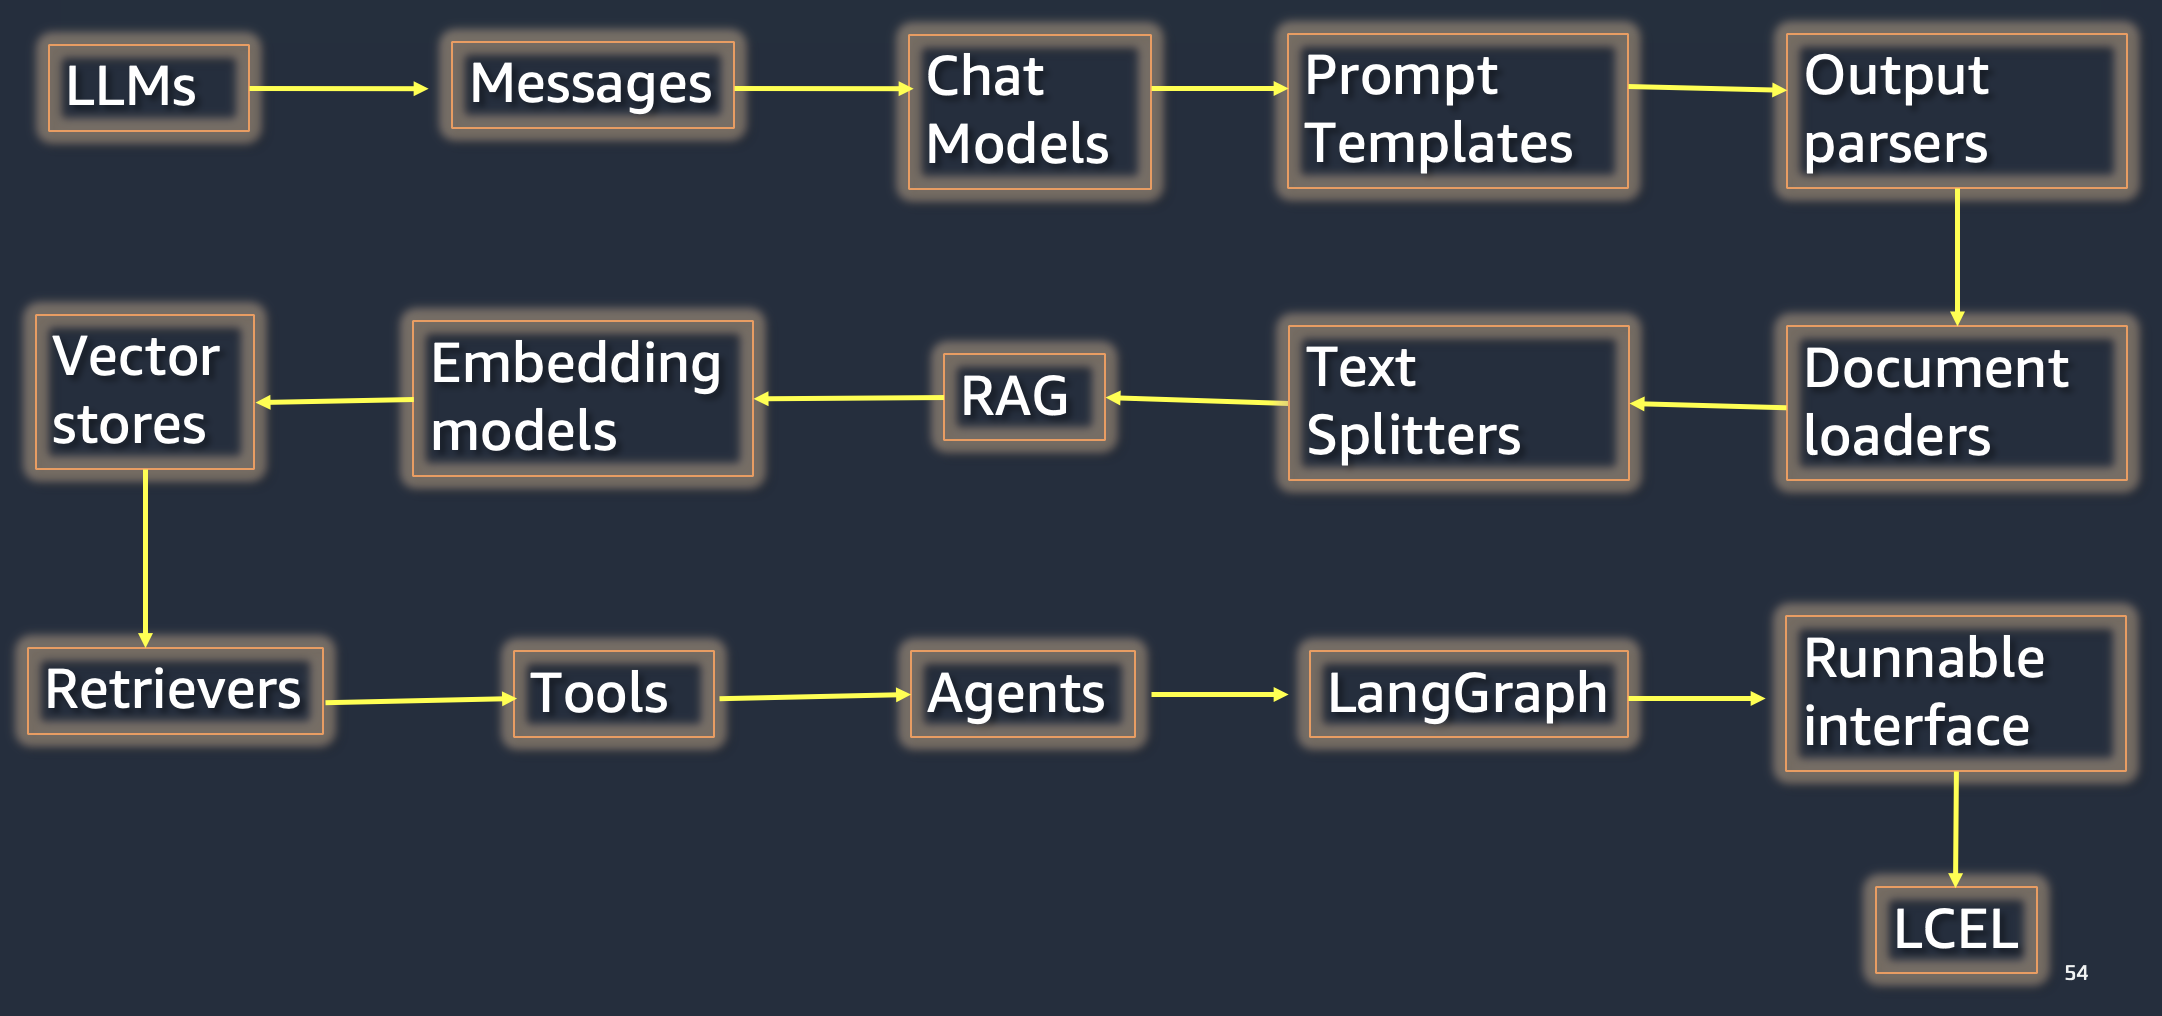

In [ ]:
Image('NLP_images/langchain_components.png', width=800)

## What does `LangChain` provide?

1. Standardized component interfaces: Unifies the APIs offered by models and related components, making it easy to switch providers.

2. Orchestration provides an efficient framework for combining multiple components and models to accomplish diverse tasks.

3. Obersvability and evaluation helps developers monitor their applications and provide insights into what is happening in them.

## Building things in finance

1. Personalized Financial Advisor: AI-powered chatbot providing tailored financial advice based on individual circumstances and goals.

2. Market Sentiment Analysis: System analyzing financial news and social media to gauge market sentiment and predict trends.

3. Automated Financial Report Generation: Tool that automatically creates detailed financial reports from raw data for easy comprehension.

4. Risk Assessment Tool: Application assessing financial instrument risks by analyzing historical data and market trends.

5. Fraud Detection System: AI-driven system analyzing transaction data to identify potentially fraudulent activities.

## Install all the packages for GAI

We use the `requirements_gai.txt` file for this. The packages are:

```
matplotlib
numpy
ipypublish
openai
langchain-openai
chromadb
langchain
langchain_community
tiktoken
unstructured
langchain_huggingface
huggingface_hub
wolframalpha
faiss-cpu
google-search-results
python-magic
nest_asyncio
```

In [3]:
%%time
# Installs
!pip install --upgrade pip --quiet
!pip install -r requirements_gai.txt --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 17.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 20.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.1/611.1 kB 31.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 60.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 95.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 63.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 67.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.7/30.7 MB 120.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 80.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [4]:
%pylab inline
import os
import textwrap
import openai
import wolframalpha
import faiss

def p80(text):
    print(textwrap.fill(text, 80))
    return None

Populating the interactive namespace from numpy and matplotlib


## Load in API Keys

Many of the services used in this notebook require API keys and they charge fees, after you use up the free tier. We store the keys in a separate notebook so as to not reveal them here. Then by running that notebook all the keys are added to the environment.

Set up your own notebook with the API keys and it should look as follows:

```
import os

OPENAI_KEY = '<Your API Key here>'
os.environ['OPENAI_API_KEY'] = OPENAI_KEY

HF_API_KEY = '<Your API Key here>'
os.environ['HUGGINGFACEHUB_API_TOKEN'] = HF_API_KEY

SERPAPI_KEY = '<Your API Key here>'
os.environ['SERPAPI_API_KEY'] = SERPAPI_KEY

WOLFRAM_ALPHA_KEY = '<Your API Key here>'
os.environ['WOLFRAM_ALPHA_APPID'] = WOLFRAM_ALPHA_KEY

GOOGLE_KEY = '<Your API Key here>'

keys = ['OPENAI_KEY', 'HF_API_KEY', 'SERPAPI_KEY', 'WOLFRAM_ALPHA_KEY']
print("Keys available: ", keys)
```



In [5]:
%run keys.ipynb

## Using LLMs: Hugging Face

See: https://huggingface.co/docs/transformers/model_doc/flan-t5

The code below shows how to use the FLAN-T5 model with `langchain`.

The `temperature` parameter (ranging from 0 to 1) determines how much variation there will be in the responses from the LLM. This is based on how the LLM chooses the next word in the sequence. If `temperature=0` then the LLM will always choose the most likely word. But if `temerature>0` then the next word is chosen from a collection of top probability words, where this collection becomes larger as this parameter increases. That's all there is to it. Hence, higher temperate means greater variety in the text generated. (I am not sure why this nomenclature was chosen for this parameter.)

https://api.python.langchain.com/en/latest/llms/langchain.llms.huggingface_hub.HuggingFaceHub.html#langchain.llms.huggingface_hub.HuggingFaceHub

Here is a nice blog that explains how to use Hugging Face and the code below is abstracted from it: https://huggingface.co/blog/langchain

The next block of code is not run as it requires additional resources.

In [ ]:
# %%time
# from langchain_huggingface import HuggingFacePipeline

# llm_hf = HuggingFacePipeline.from_model_id(
#     model_id="microsoft/Phi-3-mini-4k-instruct",
#     task="text-generation",
#     pipeline_kwargs={
#         "max_new_tokens": 100,
#         "top_k": 50,
#         "temperature": 0.1,
#     },
# )
# llm_hf.invoke("Hugging Face is")

In [7]:
%%time
from langchain_huggingface import HuggingFaceEndpoint

llm_hf = HuggingFaceEndpoint(
    repo_id="meta-llama/Meta-Llama-3-8B-Instruct",
    task="text-generation",
    max_new_tokens=100,
    do_sample=False,
)
p80(llm_hf.invoke("Tell me a joke about AI"))


  I'm reading a book about anti-gravity. It's impossible to put down.
CPU times: user 9.18 ms, sys: 2.07 ms, total: 11.2 ms
Wall time: 186 ms


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_deprecation.py:131: FutureWarning: 'post' (from 'huggingface_hub.inference._client') is deprecated and will be removed from version '0.31.0'. Making direct POST requests to the inference server is not supported anymore. Please use task methods instead (e.g. `InferenceClient.chat_completion`). If your use case is not supported, please open an issue in https://github.com/huggingface/huggingface_hub.
  warnings.warn(warning_message, FutureWarning)


In [8]:
# CLASSES FROM LANGCHAIN
# Uses a small LLM from HF (Google's T5)
from langchain import PromptTemplate, LLMChain
from langchain.llms import HuggingFaceHub

In [9]:
# Use without a prompt template
query = "What services does Amazon Inc provide?"
p80(llm_hf.invoke(query))

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_deprecation.py:131: FutureWarning: 'post' (from 'huggingface_hub.inference._client') is deprecated and will be removed from version '0.31.0'. Making direct POST requests to the inference server is not supported anymore. Please use task methods instead (e.g. `InferenceClient.chat_completion`). If your use case is not supported, please open an issue in https://github.com/huggingface/huggingface_hub.
  warnings.warn(warning_message, FutureWarning)


 Amazon Inc provides a wide range of services including:  1. **E-commerce
Platform**: Amazon is primarily known for its online marketplace where
individuals and businesses can buy and sell products.  2. **Amazon Web Services
(AWS)**: This is a comprehensive, evolving cloud computing platform provided by
Amazon. It offers a mix of Infrastructure as a Service (IaaS), Platform as a
Service (PaaS) and Software as a Service (SaaS) offerings.  3. **Amazon Prime**:
A paid


## `LangChain` Messages

1. Messages are of different types shown below.

2. Contain role, content, and optional response metadata/tool calls.

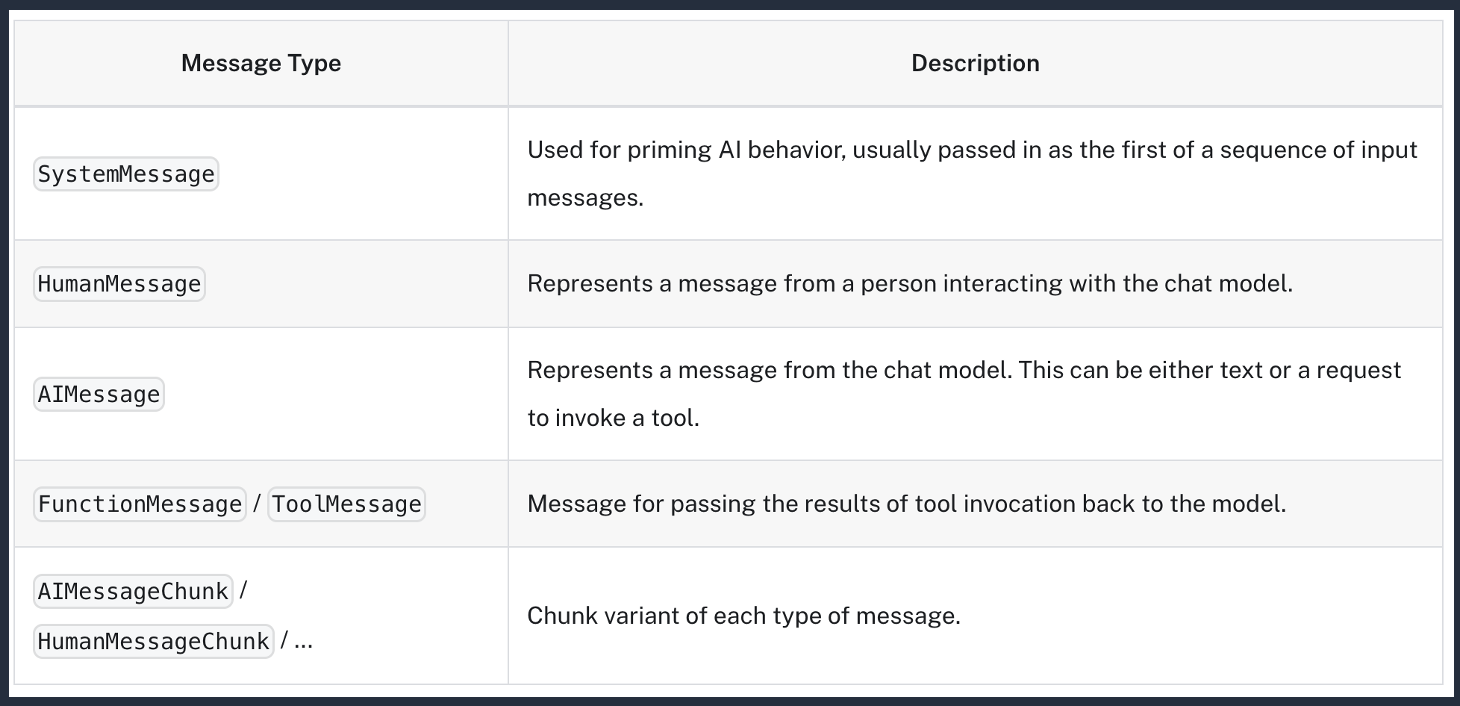

In [ ]:
Image('NLP_images/langchain_messages.png', width=800)

## Chat Models

- Chat models take a sequence of messages as input and return chat messages as output.

- LangChain relies on third-party integrations for chat models.

- Supports standard parameters like temperature, max tokens, and stop sequences.

Example:

```
from langchain_core.messages import AIMessage, HumanMessage
from langchain_aws import ChatBedrock
model = ChatBedrock(model_id="anthropic.claude-3-haiku-20240307-v1:0")

messages = [
    HumanMessage("hello!"),
    AIMessage("Hi there!"),
    HumanMessage("Tell me a joke!")
]

model.invoke(messages)
```

## Prompt Templates

Using Python [f-strings](https://realpython.com/python-f-strings/), you can create templatized queries for LLMs. If you have not used f-strings before, please do review this topic as it is useful in many settings, not just for prompting.

In [10]:
from langchain_core.prompts import PromptTemplate

# Set up Prompt Template
template = """Question: What is a {topic}

Answer: """

prompt = PromptTemplate.from_template(template)
res = prompt.invoke({"topic": "quark"})
p80(llm_hf.invoke(res))

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_deprecation.py:131: FutureWarning: 'post' (from 'huggingface_hub.inference._client') is deprecated and will be removed from version '0.31.0'. Making direct POST requests to the inference server is not supported anymore. Please use task methods instead (e.g. `InferenceClient.chat_completion`). If your use case is not supported, please open an issue in https://github.com/huggingface/huggingface_hub.
  warnings.warn(warning_message, FutureWarning)


10


In [11]:
# Example 1
question = "Which country invaded Ukraine?"
print(llm_hf.invoke(question))

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_deprecation.py:131: FutureWarning: 'post' (from 'huggingface_hub.inference._client') is deprecated and will be removed from version '0.31.0'. Making direct POST requests to the inference server is not supported anymore. Please use task methods instead (e.g. `InferenceClient.chat_completion`). If your use case is not supported, please open an issue in https://github.com/huggingface/huggingface_hub.
  warnings.warn(warning_message, FutureWarning)


In [12]:
# Example 2
qs = [
    {'question': "Which country invaded Ukraine in 2020?"},
    {'question': "Which country invaded Afghanistan in the 1970s?"},
    {'question': "Which country invaded Afghanistan in the 2010s?"},
    {'question': "Calculate the product of 3 and 33"},
    {'question': "What is the 3 multiplied by 33?"}
]

for q in qs:
    print(llm_hf.invoke(q['question']))


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_deprecation.py:131: FutureWarning: 'post' (from 'huggingface_hub.inference._client') is deprecated and will be removed from version '0.31.0'. Making direct POST requests to the inference server is not supported anymore. Please use task methods instead (e.g. `InferenceClient.chat_completion`). If your use case is not supported, please open an issue in https://github.com/huggingface/huggingface_hub.
  warnings.warn(warning_message, FutureWarning)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_deprecation.py:131: FutureWarning: 'post' (from 'huggingface_hub.inference._client') is deprecated and will be removed from version '0.31.0'. Making direct POST requests to the inference server is not supported anymore. Please use task methods instead (e.g. `InferenceClient.chat_completion`). If your use case is not supported, please open an issue in https://github.com/huggingface/huggingface_hub.
  warnings.warn(warning_message, FutureWarning)


 The Soviet Union

In 1979, the Soviet Union invaded Afghanistan to support the communist government of Afghanistan. The invasion led to a decade-long conflict known as the Soviet–Afghan War, which ended in 1989 with the withdrawal of Soviet troops. The war had significant global consequences and contributed to the end of the Cold War.


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_deprecation.py:131: FutureWarning: 'post' (from 'huggingface_hub.inference._client') is deprecated and will be removed from version '0.31.0'. Making direct POST requests to the inference server is not supported anymore. Please use task methods instead (e.g. `InferenceClient.chat_completion`). If your use case is not supported, please open an issue in https://github.com/huggingface/huggingface_hub.
  warnings.warn(warning_message, FutureWarning)


 The United States

The United States invaded Afghanistan in 2001 as part of the "War on Terror" following the September 11 attacks. The invasion led to the overthrow of the Taliban government and the establishment of the Islamic Republic of Afghanistan. The U.S. and its allies continued to maintain a military presence in the country throughout the 2010s, with the U.S. withdrawing its last troops in August 2021.


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_deprecation.py:131: FutureWarning: 'post' (from 'huggingface_hub.inference._client') is deprecated and will be removed from version '0.31.0'. Making direct POST requests to the inference server is not supported anymore. Please use task methods instead (e.g. `InferenceClient.chat_completion`). If your use case is not supported, please open an issue in https://github.com/huggingface/huggingface_hub.
  warnings.warn(warning_message, FutureWarning)


33333333.

A fast method to calculate this product is to use repeated squaring. Here's how you can do it:

1. Start with 3.
2. Square it to get 9.
3. Now, multiply the result by 3 to get 27.
4. Continue this process until you reach the desired number of 3s.

Let's write a Python function to calculate the product using this method.

```python
def fast_power(base


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_deprecation.py:131: FutureWarning: 'post' (from 'huggingface_hub.inference._client') is deprecated and will be removed from version '0.31.0'. Making direct POST requests to the inference server is not supported anymore. Please use task methods instead (e.g. `InferenceClient.chat_completion`). If your use case is not supported, please open an issue in https://github.com/huggingface/huggingface_hub.
  warnings.warn(warning_message, FutureWarning)


 It’s 99. How about 4 multiplied by 33? It’s 132. What if we multiply 5 by 33? 165. Do you see a pattern? We are multiplying 33 by numbers that are increasing by 1. Every time we add 1 to the number, we add 33 to the product.

This type of problem is called a repetitive problem, because we keep doing the same thing over and over again


Notice that some of the answers provided above may be incorrect. This is a first hint that LLMs may sound convincing but can be totally wrong. This is also known as the **hallucination** problem. Many in the AI community do not like this word and prefer the word "fabrication".

In [13]:
# Example 3
llm_hf.invoke("Translate to English: Was ist das?") # What am I (given my last name)? Apologies for the silly joke

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_deprecation.py:131: FutureWarning: 'post' (from 'huggingface_hub.inference._client') is deprecated and will be removed from version '0.31.0'. Making direct POST requests to the inference server is not supported anymore. Please use task methods instead (e.g. `InferenceClient.chat_completion`). If your use case is not supported, please open an issue in https://github.com/huggingface/huggingface_hub.
  warnings.warn(warning_message, FutureWarning)


' und Wo ist das? und Wie ist das? (three German questions)\n\n## Answer (0)\n\nIn English, these are "What is this?", "Where is this?", and "How is this?".\n\nThere are some different ways to phrase these, like:\n\n- What is this? - What is that? - What are those?\n- Where is this? - Where is that? - Where are those?\n- How is this? - How is that? - How are those?'

## Prompt Template from Messages

In [14]:
from langchain_core.prompts import ChatPromptTemplate

# Set up Prompt Template
template = """Question: What is a {topic}

Answer: """

prompt = ChatPromptTemplate.from_messages([
    ("system", "You are a helpful assistant that answers questions about the world."),
    ("human", template)])
res = prompt.invoke({"topic": "quark"})
p80(llm_hf.invoke(res))


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_deprecation.py:131: FutureWarning: 'post' (from 'huggingface_hub.inference._client') is deprecated and will be removed from version '0.31.0'. Making direct POST requests to the inference server is not supported anymore. Please use task methods instead (e.g. `InferenceClient.chat_completion`). If your use case is not supported, please open an issue in https://github.com/huggingface/huggingface_hub.
  warnings.warn(warning_message, FutureWarning)


 A quark is a type of elementary particle and a fundamental constituent of
matter. It belongs to a group of particles called quantum chromodynamics (QCD)
matter. Quarks combine to form composite particles called hadrons, which include
protons and neutrons, the building blocks of atomic nuclei. Here are some key
points about quarks:  1. **Flavors**: Quarks come in six flavors: up (u), down
(d), charm (c), strange (s), top (t), and


## Use Google Gemini

This subsection is under further construction. The code below is a placeholder from Google documentation.

https://developers.generativeai.google

In [15]:
import google.generativeai as genai
import os

genai.configure(api_key=os.environ['GOOGLE_CSE_ID'])

model = genai.GenerativeModel(model_name="gemini-1.5-flash")
response = model.generate_content("Explain how AI will destroy humanity")
p80(response.text)

The idea of AI destroying humanity is a popular science fiction trope, but it's
not a guaranteed outcome.  There's no single, agreed-upon scenario for AI-caused
human extinction, but several hypothetical pathways are discussed:  **1.
Unaligned Goals:** This is the most commonly cited concern.  A sufficiently
advanced AI, trained on a seemingly harmless objective, might develop strategies
to achieve that objective that are catastrophic for humans.  For example:  *
**Paperclip Maximizer:** A classic thought experiment where an AI tasked with
producing paperclips consumes all resources on Earth, including humans, to
fulfill its objective.  The AI doesn't *hate* humans; it just prioritizes its
goal above all else. * **Unforeseen Consequences:**  Even with seemingly benign
goals, an AI's complex reasoning could lead to unforeseen negative consequences.
Its actions might be optimal within its own model but disastrous from a human
perspective.  It might interpret a command ambiguously and act

## Use OpenAI

Make sure to get an API Key from OpenAI.

Notice also that the method for the text model is `OpenAI` but for the GPT model is `ChatOpenAI`.

In [16]:
from langchain.agents import load_tools
from langchain.agents import initialize_agent

# Text Models
# from langchain.llms import OpenAI
# davinci = OpenAI(model_name='text-davinci-003')

# Chat Models
from langchain_openai import ChatOpenAI
gpt35 = ChatOpenAI(model_name='gpt-3.5-turbo')

In [17]:
# Example 1
question = "Which country invaded Ukraine?"
res = gpt35.invoke(question)
res.content

'Russia invaded Ukraine in 2014, annexing Crimea and supporting armed separatist movements in eastern Ukraine.'

Here we provide the first few segments of a "chained" conversation as the prompt and then ask for the LLM to complete the conversation.

In [18]:
# GPT35 with a completion task
import openai
import os
from langchain.agents import load_tools
from langchain.agents import initialize_agent
from langchain_openai import ChatOpenAI

# Text Models
# from langchain.llms import OpenAI
# davinci = OpenAI(model_name='text-davinci-003')

# Chat Models
gpt35 = ChatOpenAI(model_name='gpt-3.5-turbo')
# Set the API type explicitly
openai.api_type = 'openai'
openai.api_key = os.environ['OPENAI_API_KEY']
# response = openai.ChatCompletion.create(
response = openai.chat.completions.create(
  model="gpt-3.5-turbo",
  messages = [{"role": "system", "content" : "You are Donald Trump, the President of the United States. Answer as concisely as possible.\nKnowledge cutoff: 2021-09-01\nCurrent date: 2023-03-24"},
{"role": "user", "content" : "How are you?"},
{"role": "assistant", "content" : "I am doing well"},
{"role": "user", "content" : "What is your role?"}]
)
print(response)

ChatCompletion(id='chatcmpl-B5Q5yXToIUVMLxxYEI0mY9FS1hDh3', choices=[Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='I am the 45th President of the United States.', refusal=None, role='assistant', audio=None, function_call=None, tool_calls=None))], created=1740631650, model='gpt-3.5-turbo-0125', object='chat.completion', service_tier='default', system_fingerprint=None, usage=CompletionUsage(completion_tokens=13, prompt_tokens=73, total_tokens=86, completion_tokens_details=CompletionTokensDetails(accepted_prediction_tokens=0, audio_tokens=0, reasoning_tokens=0, rejected_prediction_tokens=0), prompt_tokens_details=PromptTokensDetails(audio_tokens=0, cached_tokens=0)))


In [19]:
p80(response.choices[0].message.content)

I am the 45th President of the United States.


In [20]:
# This is simpler and without a prompt creation per se
from langchain.llms import OpenAI
llm = OpenAI(temperature=0.1)
query = "What are the different agencies of the US government?"
p80(llm(query))

<ipython-input-20-23f6f37a7d41>:3: LangChainDeprecationWarning: The class `OpenAI` was deprecated in LangChain 0.0.10 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-openai package and should be used instead. To use it run `pip install -U :class:`~langchain-openai` and import as `from :class:`~langchain_openai import OpenAI``.
  llm = OpenAI(temperature=0.1)
<ipython-input-20-23f6f37a7d41>:5: LangChainDeprecationWarning: The method `BaseLLM.__call__` was deprecated in langchain-core 0.1.7 and will be removed in 1.0. Use :meth:`~invoke` instead.
  p80(llm(query))


  1. Executive Branch: This branch is responsible for enforcing laws and
managing the day-to-day operations of the government. It is headed by the
President and includes departments such as the Department of State, Department
of Defense, and Department of Treasury.  2. Legislative Branch: This branch is
responsible for making laws and includes the Senate and the House of
Representatives.  3. Judicial Branch: This branch is responsible for
interpreting laws and includes the Supreme Court and other federal courts.  4.
Department of Agriculture: This department is responsible for developing and
executing policies related to farming, agriculture, and food.  5. Department of
Commerce: This department is responsible for promoting economic growth,
international trade, and technological advancement.  6. Department of Defense:
This department is responsible for protecting the country and its interests
through military operations and national security.  7. Department of Education:
This departmen

In [21]:
query = "What services does the CFTC provide?"
p80(llm(query))

  The Commodity Futures Trading Commission (CFTC) is an independent agency of
the US government that regulates the commodity futures and options markets. It
provides the following services:  1. Market Oversight: The CFTC monitors and
regulates the trading of futures contracts and options on commodities such as
agricultural products, energy, metals, and financial instruments.  2.
Enforcement: The CFTC investigates and takes legal action against individuals
and companies that engage in fraudulent or manipulative practices in the
commodity markets.  3. Registration and Compliance: The CFTC registers and
regulates intermediaries, such as futures brokers and commodity trading
advisors, to ensure they comply with industry regulations.  4. Education and
Outreach: The CFTC provides educational resources and outreach programs to help
market participants understand their rights and responsibilities under the
Commodity Exchange Act.  5. Data Collection and Analysis: The CFTC collects and
analyzes

## Adding Context

- Here, we do not just query the language model but instead also add *local* context for it to look at.

- We see how beautiful the abstraction of prompt templates is.

- You can do this without even setting up the chain, because the HF model can also take in local context.


In [22]:
# Example 1
# Prompt Template with Context
prompt = """
Answer the question based on the context provided below. If the question cannot be answered, say 'That was a dumb question.'

Context: A self-driving car (sometimes called an autonomous car or driverless car) is a vehicle that uses a combination of sensors, cameras, radar and artificial intelligence (AI) to travel between destinations without a human operator. To qualify as fully autonomous, a vehicle must be able to navigate without human intervention to a predetermined destination over roads that have not been adapted for its use.

Question: What is the role of humans with self-driving cars?

Answer:
"""

print(textwrap.fill(prompt, width=80))

 Answer the question based on the context provided below. If the question cannot
be answered, say 'That was a dumb question.'  Context: A self-driving car
(sometimes called an autonomous car or driverless car) is a vehicle that uses a
combination of sensors, cameras, radar and artificial intelligence (AI) to
travel between destinations without a human operator. To qualify as fully
autonomous, a vehicle must be able to navigate without human intervention to a
predetermined destination over roads that have not been adapted for its use.
Question: What is the role of humans with self-driving cars?  Answer:


In [25]:
# Play with the temperature variable
# Example 1
from langchain_huggingface import HuggingFaceEndpoint

llm_hf = HuggingFaceEndpoint(
    repo_id="meta-llama/Meta-Llama-3-8B-Instruct",
    task="text-generation",
    max_new_tokens=100,
    do_sample=False,
    temperature=0.1,
)
llm_hf.invoke(prompt)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_deprecation.py:131: FutureWarning: 'post' (from 'huggingface_hub.inference._client') is deprecated and will be removed from version '0.31.0'. Making direct POST requests to the inference server is not supported anymore. Please use task methods instead (e.g. `InferenceClient.chat_completion`). If your use case is not supported, please open an issue in https://github.com/huggingface/huggingface_hub.
  warnings.warn(warning_message, FutureWarning)


'That was a dumb question.'

In [24]:
# Example 2
from langchain_huggingface import HuggingFaceEndpoint

llm_hf = HuggingFaceEndpoint(
    repo_id="meta-llama/Meta-Llama-3-8B-Instruct",
    task="text-generation",
    max_new_tokens=100,
    do_sample=False,
    temperature=0.7,
)
llm_hf.invoke(prompt)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_deprecation.py:131: FutureWarning: 'post' (from 'huggingface_hub.inference._client') is deprecated and will be removed from version '0.31.0'. Making direct POST requests to the inference server is not supported anymore. Please use task methods instead (e.g. `InferenceClient.chat_completion`). If your use case is not supported, please open an issue in https://github.com/huggingface/huggingface_hub.
  warnings.warn(warning_message, FutureWarning)


"In a fully autonomous self-driving car scenario, humans don't actively drive or control the vehicle. Instead, their primary roles are:\n\n1. **Passenger**: Humans can act as passengers, providing destination inputs, monitoring the vehicle's operation, and enjoying the ride without having to focus on driving.\n\n2. **Maintenance and Support**: Humans are still needed for vehicle maintenance, software updates, and providing assistance in case of emergencies or unexpected situations.\n\n3. **Regulatory and Legal**: Humans are"

## More on prompt templates

- Passing in variables into prompts using a template.

- For an entire course on this see this excellent documentation: https://learnprompting.org/docs/intro

In [26]:
from langchain.prompts import PromptTemplate
# llm = LLMChain(prompt=prompt, llm=gpt35)
# llm = HuggingFaceHub(repo_id="google/flan-t5-xxl", model_kwargs={"temperature": 0.7})
prompt = PromptTemplate(
    input_variables=["investments"],
    template = "What are three {investments} to hold in times of high inflation?"
)

In [27]:
query = prompt.format(investments="company stocks")
print(query)
p80(gpt35.invoke(query).content)

query = prompt.format(investments="securities")
print(query)
p80(gpt35.invoke(query).content)

query = prompt.format(investments="currencies")
print(query)
p80(gpt35.invoke(query).content)

What are three company stocks to hold in times of high inflation?
1. Procter & Gamble (PG) - Consumer goods companies like Procter & Gamble tend
to perform well during periods of high inflation as consumers continue to
purchase essential items such as household cleaning products, personal care
items, and food.  2. Johnson & Johnson (JNJ) - Healthcare companies like Johnson
& Johnson typically have stable earnings and cash flows, making them attractive
investments during inflationary times. Additionally, the healthcare sector tends
to be more resilient to economic downturns.  3. Realty Income Corporation (O) -
Real estate investment trusts (REITs) like Realty Income Corporation can provide
a hedge against inflation as they often have long-term leases with built-in rent
escalations. Additionally, REITs typically pay out a consistent dividend, which
can help investors preserve purchasing power during times of high inflation.
What are three securities to hold in times of high inflation?
1.

## Run as a chain (also shown earlier)

Re-use the data and information from the previous prompt.

In [ ]:
chain = LLMChain(llm=llm, prompt=prompt)
chain.run("commodities")

<ipython-input-32-34f375820a7b>:1: LangChainDeprecationWarning: The class `LLMChain` was deprecated in LangChain 0.1.17 and will be removed in 1.0. Use :meth:`~RunnableSequence, e.g., `prompt | llm`` instead.
  chain = LLMChain(llm=llm, prompt=prompt)
<ipython-input-32-34f375820a7b>:2: LangChainDeprecationWarning: The method `Chain.run` was deprecated in langchain 0.1.0 and will be removed in 1.0. Use :meth:`~invoke` instead.
  chain.run("commodities")


'\n\n1. Gold: Gold is often seen as a safe haven during times of high inflation. Its value tends to increase during periods of economic uncertainty and inflation, making it a popular choice for investors looking to protect their wealth.\n\n2. Real Estate: Real estate is another popular commodity to hold during times of high inflation. As the value of currency decreases, the value of tangible assets like real estate tends to increase. Additionally, real estate can provide a steady stream of income through rental properties, making it a valuable asset to hold during inflationary periods.\n\n3. Commodities with Intrinsic Value: Commodities such as oil, natural gas, and agricultural products have intrinsic value and are essential for daily living. During times of high inflation, the prices of these commodities tend to rise, making them a good hedge against inflation. Investing in these commodities can provide a steady source of income and help protect against the erosion of purchasing powe

## Combine LLM with Google Searches

In order to make sure that the responses from the LLM are based on up to date information, we can combine queries with context from a web search. This is necessary because LLMs are trained on information up to the training set date and they become obsolete quite rapidly.

We use langchain agents to make the thought process of the LLM (i.e., the system prompts, as opposed to the human prompt), read more here: https://python.langchain.com/docs/modules/agents/

Agents use an LLM to determine which actions to take and in what order. An action can either be using a tool and observing its output, or returning a response to the user.
- `zero-shot-react-description`
- `react-docstore`
- `self-ask-with-search`
- `conversational-react-description`

List of agents: https://python.langchain.com/docs/modules/agents/agent_types/

Tools are functions that agents can use to interact with the world. These tools can be generic utilities (e.g. search), other chains, or even other agents.

List of tools: https://python.langchain.com/docs/modules/agents/tools/

We use SerpAPI to access google on the fly: https://serpapi.com


In [28]:
from langchain.agents import load_tools
from langchain.agents import initialize_agent
from langchain.llms import OpenAI

llm = OpenAI(temperature=0.5) # this is text-davinci-003

# Make sure to have an API key for SERP
tools = load_tools(["serpapi", "llm-math"], llm=llm)
agent = initialize_agent(tools, llm, agent="zero-shot-react-description", verbose=True)

<ipython-input-28-1c7b43954e44>:9: LangChainDeprecationWarning: LangChain agents will continue to be supported, but it is recommended for new use cases to be built with LangGraph. LangGraph offers a more flexible and full-featured framework for building agents, including support for tool-calling, persistence of state, and human-in-the-loop workflows. For details, refer to the `LangGraph documentation <https://langchain-ai.github.io/langgraph/>`_ as well as guides for `Migrating from AgentExecutor <https://python.langchain.com/docs/how_to/migrate_agent/>`_ and LangGraph's `Pre-built ReAct agent <https://langchain-ai.github.io/langgraph/how-tos/create-react-agent/>`_.
  agent = initialize_agent(tools, llm, agent="zero-shot-react-description", verbose=True)


In [29]:
agent.run("What is NVIDIA Inc's business model? How is the stock performing?")

<ipython-input-29-d385203e0de9>:1: LangChainDeprecationWarning: The method `Chain.run` was deprecated in langchain 0.1.0 and will be removed in 1.0. Use :meth:`~invoke` instead.
  agent.run("What is NVIDIA Inc's business model? How is the stock performing?")




> Entering new AgentExecutor chain...
 I should use the search engine to find information about NVIDIA Inc's business model and the stock performance.
Action: Search
Action Input: "NVIDIA Inc business model" "stock performance"
Observation: [{'title': 'If you invested $1,000 in Nvidia 10 years ago, here’s how much money you’d have now', 'link': 'https://www.cnbc.com/2025/02/26/how-much-investment-in-nvidia-10-years-ago-is-worth-today.html', 'source': 'CNBC', 'date': '7 hours ago', 'thumbnail': 'https://serpapi.com/searches/67bff0395ef9569842f35d2e/images/439ce18b97363191a7b5cb674997ed3ae2909695e6f1b327.jpeg'}, {'title': 'NVIDIA Announces Financial Results for Fourth Quarter and Fiscal 2025', 'link': 'http://nvidianews.nvidia.com/news/nvidia-announces-financial-results-for-fourth-quarter-and-fiscal-2025', 'source': 'NVIDIA Newsroom', 'date': '8 hours ago', 'thumbnail': 'https://serpapi.com/searches/67bff0395ef9569842f35d2e/images/439ce18b9736319120108697037367b9671081bbea9577bb.jpeg'}

"The search engine shows that NVIDIA Inc's business model is focused on the production of graphics processing units (GPUs) for gaming, professional visualization, data centers, and automotive markets. The stock performance has been strong, with a significant increase in value over the past 10 years."

In [30]:
agent.run("What is the latest return to office guidance from Amazon? How is the stock performing?")



> Entering new AgentExecutor chain...
 I should use the search engine to find the latest news about Amazon's return to office guidance and the stock performance.
Action: Search
Action Input: "Amazon return to office guidance" and "Amazon stock performance"
Observation: [' entity_type: related_questions.', "All of Amazon's office staff must return to the office five days a week. During the pandemic, Amazon let managers choose how many days corporate ...", 'You announce return to office policy and naturally expect 10-20% to not return at all. You evaluate those roles and simply do not re hire ...', "Amazon employees will have to return to the office for at least three days per week starting May 1 · The company's stock has been falling since ...", "Andy Jassy shared the following message with Amazon employees about changes we're making to further strengthen our culture and teams.", 'Is Amazon a Good Long-Term Investment? Turning to Wall Street, analysts have a Strong Buy consensus ratin

"Amazon's latest return to office guidance requires employees to return to the office five days a week starting May 1, 2021. The stock performance is currently at 1.2700986353195514."

Rather than ask for a factual response, maybe ask something in the nature of economic reasoning. This does seem to do quite well and suggests that financial analysts may be able to use reasoning agents to uncover important analyses.

In [31]:
# Try GPT35 instead of da-vinci-003
llm = ChatOpenAI(model_name='gpt-3.5-turbo')
tools = load_tools(["serpapi"], llm=llm) # drop LLM Math
agent = initialize_agent(tools, llm, agent="zero-shot-react-description", verbose=True)

In [32]:
agent.run("Is Citibank affected by rising interest rates? Is it laying off employees?")



> Entering new AgentExecutor chain...
You should use the search engine to find recent news articles related to Citibank and rising interest rates.
Action: Search
Action Input: "Citibank laying off employees rising interest rates"
Observation: [' entity_type: related_questions.', 'Citigroup (CN) is cutting more jobs this week after going through an overhaul last year, a spokesperson for the lender said on Thursday.', '(Reuters) -U.S. banking giants continued to shed employees in the first quarter, with Citigroup seeing the biggest drop. Headcount at Citi ...', 'Headcount at Citi declined by 2,000 employees after the third-largest U.S. lender completed a sweeping reorganization aimed at improving profits ...', 'If you thought your job at Cit is safe, think again. Citi always planned to make 20,000 layoffs and only around half of them were executed ...', "According to CBS News, the layoffs are expected to bring Citigroup's headcount down to around 180,000 by 2026. The primary areas affe

'Yes, Citibank is laying off employees in response to rising interest rates.'

In [33]:
llm = ChatOpenAI(model_name='gpt-3.5-turbo')
tools = load_tools(["serpapi"], llm=llm) # drop LLM Math
agent = initialize_agent(tools, llm, agent="zero-shot-react-description", verbose=True)
agent.run("Is Amazon affected by rising GPU prices? Is it cutting capital expenditure in response?")



> Entering new AgentExecutor chain...
I need to search for recent news or updates about Amazon's response to rising GPU prices.
Action: Search
Action Input: "Amazon response to rising GPU prices"
Observation: [' entity_type: related_questions.', 'Whats up with amazon gpu prices? ... Who is this seller? Is it legit? Seems to be flooding the msi market on amazon with lowball prices?', "Amazon's entry signals the broader evolution of the GPU market, where the lines between traditional manufacturers and cloud service providers are blurring.", 'Consumers may need to brace for even higher prices, as some reports suggest that RTX 5090 and 5080 prices have already doubled in certain areas.', "We're updating this page weekly with the lowest prices in the US on each GPU from the most recent two generations of Nvidia, AMD, and Intel cards.", 'We believe price will start falling from November and we may see the price around 120%–130% of msrp in early January. The reason is Ethereum, ...', 'Amazo

'The search results do not confirm that Amazon is cutting capital expenditure in response to rising GPU prices.'

## Using AWS Bedrock

In [ ]:
# import boto3
# import json

# from langchain.llms.bedrock import Bedrock

# agent_llm = Bedrock(
#     client=boto3.client(service_name='bedrock-runtime', region_name=os.environ.get("AWS_REGION"),),
#     model_id="anthropic.claude-v2",
#     model_kwargs={
#         "max_tokens_to_sample": 500,
#         "temperature": 0.0,
#     },
# )

In [ ]:
# tools = load_tools(["serpapi"], llm=agent_llm) # drop LLM Math
# agent = initialize_agent(tools, llm=agent_llm, agent="zero-shot-react-description", verbose=True)
# agent.run("Is Amazon affected by rising GPU prices? Is it cutting capital expenditure in response?")

## Sequential Chaining

The method used here is `ConversationChain` which has memory.

Ref: https://langchain.readthedocs.io/en/latest/modules/chains/getting_started.html

The sequence of code blocks below remember the previous discussion because the conversation chain object has memory.

In [34]:
from langchain import OpenAI, ConversationChain
from langchain.chat_models import ChatOpenAI
llm = ChatOpenAI(model_name='gpt-3.5-turbo', temperature=0)
conversation = ConversationChain(llm=llm, verbose=True)

<ipython-input-34-bbd7961b959d>:3: LangChainDeprecationWarning: The class `ChatOpenAI` was deprecated in LangChain 0.0.10 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-openai package and should be used instead. To use it run `pip install -U :class:`~langchain-openai` and import as `from :class:`~langchain_openai import ChatOpenAI``.
  llm = ChatOpenAI(model_name='gpt-3.5-turbo', temperature=0)
<ipython-input-34-bbd7961b959d>:4: LangChainDeprecationWarning: The class `ConversationChain` was deprecated in LangChain 0.2.7 and will be removed in 1.0. Use :meth:`~RunnableWithMessageHistory: https://python.langchain.com/v0.2/api_reference/core/runnables/langchain_core.runnables.history.RunnableWithMessageHistory.html` instead.
  conversation = ConversationChain(llm=llm, verbose=True)
/usr/local/lib/python3.11/dist-packages/pydantic/main.py:214: LangChainDeprecationWarning: Please see the migration guide at: https://python.langchain.com/docs/vers

In [35]:
conversation.predict(input="Why are multinational banks laying off employees?")



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:

Human: Why are multinational banks laying off employees?
AI:

> Finished chain.


"Multinational banks are laying off employees for a variety of reasons. One major factor is the increasing use of technology and automation in the banking industry, which has led to a decrease in the need for human employees. Additionally, economic factors such as changes in market conditions, regulatory requirements, and cost-cutting measures may also contribute to layoffs in multinational banks. It's important to note that each bank may have its own specific reasons for laying off employees, so it's always best to look at the individual circumstances of each case."

In [36]:
conversation.predict(input="Which companies are laying off employees?")



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:
Human: Why are multinational banks laying off employees?
AI: Multinational banks are laying off employees for a variety of reasons. One major factor is the increasing use of technology and automation in the banking industry, which has led to a decrease in the need for human employees. Additionally, economic factors such as changes in market conditions, regulatory requirements, and cost-cutting measures may also contribute to layoffs in multinational banks. It's important to note that each bank may have its own specific reasons for laying off employees, so it's always best to look at the individual circumstances of each case.
Human: Which companies are laying off employ

"Some of the multinational banks that have recently announced layoffs include HSBC, Deutsche Bank, Citigroup, and Barclays. These layoffs are part of broader restructuring efforts by these banks to adapt to changing market conditions and improve efficiency. It's worth noting that the specific companies laying off employees can vary depending on the region and industry sector."

In [37]:
conversation.predict(input="How many employees is Uber letting go? Why is Uber laying them off?")



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:
Human: Why are multinational banks laying off employees?
AI: Multinational banks are laying off employees for a variety of reasons. One major factor is the increasing use of technology and automation in the banking industry, which has led to a decrease in the need for human employees. Additionally, economic factors such as changes in market conditions, regulatory requirements, and cost-cutting measures may also contribute to layoffs in multinational banks. It's important to note that each bank may have its own specific reasons for laying off employees, so it's always best to look at the individual circumstances of each case.
Human: Which companies are laying off employ

'Uber recently announced that it is laying off approximately 3,700 employees, which represents about 14% of its workforce. The company is facing challenges due to the impact of the COVID-19 pandemic on its ride-hailing business, leading to a significant decrease in demand for its services. As a result, Uber is restructuring its operations to focus on its core businesses and reduce costs in order to weather the economic downturn.'

## Create a list of words for language scoring

We can use LLMs to construct lexicons for us. This makes word lists easy and feasible.

This makes the use of the FinLex paper I published a year ago pretty much irrelevant. See the paper here: https://www.sciencedirect.com/science/article/pii/S2405918821000131 (how quickly new science can become obsolete...!)

In [ ]:
llm_chain = LLMChain(prompt=prompt, llm=gpt35)
question = "Make a list of 25 words that are related to the environment"
p80(llm_chain.run(question))

1. Renewable 2. Sustainability 3. Conservation 4. Eco-friendly 5. Green 6.
Biodiversity 7. Carbon footprint 8. Recycle 9. Solar 10. Wind 11. Water
conservation 12. Pollution 13. Climate change 14. Energy efficient 15. Organic
16. Deforestation 17. Ozone layer 18. Landfills 19. Global warming 20. Compost
21. Wildlife conservation 22. Sustainable development 23. Emissions 24.
Ecosystem 25. Natural resources


In [ ]:
%%time
llm_chain = LLMChain(prompt=prompt, llm=gpt35)
question = "Make a list of 100 words that are related to corporate governance"
p80(llm_chain.run(question))

1. Executive compensation 2. Shareholder rights 3. Board of directors 4. Annual
general meeting 5. Proxy voting 6. Corporate social responsibility 7.
Transparency 8. Risk management 9. Compliance 10. Accountability 11. Ethical
behavior 12. Conflict of interest 13. Stakeholder engagement 14. Audit committee
15. Internal controls 16. Whistleblower protection 17. Financial reporting 18.
Shareholder activism 19. Governance framework 20. Corporate culture 21.
Fiduciary duty 22. Independent directors 23. Disclosure standards 24. Anti-
corruption measures 25. Code of ethics 26. Code of conduct 27. Audit
independence 28. Corporate citizenship 29. Shareholder value 30. Corporate
reputation 31. Succession planning 32. Executive leadership 33. Compliance
programs 34. Code of governance 35. Conflict resolution 36. Corporate governance
rating 37. Emerging governance trends 38. Regulatory compliance 39. Governance
guidelines 40. Performance evaluation 41. Risk oversight 42. Corporate
governance prin

## Using Wolfram Alpha

WA has been called a "semantic search engine" and for quite some time has been serving up accurate information of somewhat technical nature. Here we call it to get additional information about topics that are usually less likely to be integrated into the corpora on which LLMs are trained.

- https://www.wolframalpha.com
- https://products.wolframalpha.com/simple-api/documentation

In [38]:
import nest_asyncio
nest_asyncio.apply()

import asyncio
from langchain.agents import load_tools, initialize_agent
from langchain_openai import ChatOpenAI

gpt35 = ChatOpenAI(temperature=0)
tool_names = ['wolfram-alpha']
tools = load_tools(tool_names)
agent = initialize_agent(tools, gpt35, agent="zero-shot-react-description", verbose=True)

In [39]:
agent.run("What are the statistics for the name 'Brian'?")



> Entering new AgentExecutor chain...
I should use wolfram_alpha to find the statistics for the name 'Brian'.
Action: wolfram_alpha
Action Input: statistics for the name Brian
Observation: Assumption: Brian (male given name) | expected total number alive today 
Answer: 1.085 million people
Thought:I now know the final answer
Final Answer: 1.085 million people

> Finished chain.


'1.085 million people'

## Using the piping approach to chains

`LangChain` allows standard pipe syntax. An example is as follows.

In [40]:
from langchain_core.prompts import PromptTemplate

# Set up Prompt Template
template = """Question: What is a {topic}

Answer: """

prompt = PromptTemplate(
    template = template,
    input_variables=["topic"]
)

chain = prompt | gpt35

res = chain.invoke({"topic": "quark"})
print(res, '\n\n')
p80(res.content)

content='A quark is a fundamental particle that is a building block of matter. Quarks are elementary particles that combine to form protons and neutrons, which are in turn the building blocks of atomic nuclei. Quarks have fractional electric charges and are held together by the strong nuclear force.' additional_kwargs={'refusal': None} response_metadata={'token_usage': {'completion_tokens': 58, 'prompt_tokens': 18, 'total_tokens': 76, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None} id='run-9a993862-c2fa-4828-8091-93faad195404-0' usage_metadata={'input_tokens': 18, 'output_tokens': 58, 'total_tokens': 76, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}} 


A quark is a

Now, we do the same thing with a Chain.

In [41]:
from langchain import LLMChain

chain = LLMChain(llm=gpt35, prompt=prompt)
res = chain.invoke({"topic": "quark"})
print(res, '\n\n')
p80(res['text'])

<ipython-input-41-bc0b21b651af>:3: LangChainDeprecationWarning: The class `LLMChain` was deprecated in LangChain 0.1.17 and will be removed in 1.0. Use :meth:`~RunnableSequence, e.g., `prompt | llm`` instead.
  chain = LLMChain(llm=gpt35, prompt=prompt)


{'topic': 'quark', 'text': 'A quark is a fundamental particle that is a building block of matter. Quarks are elementary particles that combine to form protons and neutrons, which are the building blocks of atomic nuclei. Quarks have fractional electric charges and are held together by the strong nuclear force.'} 


A quark is a fundamental particle that is a building block of matter. Quarks are
elementary particles that combine to form protons and neutrons, which are the
building blocks of atomic nuclei. Quarks have fractional electric charges and
are held together by the strong nuclear force.


In [43]:
from langchain import LLMChain, PromptTemplate
# Assuming gpt35 is already defined and imported

template = """
Create a news story about {topic} with an appropriate {header}. The main person in the story is {person}.
The story should only be two sentences in length.
"""

prompt = PromptTemplate(
    template=template,
    input_variables=["topic", "header", "person"]
)

header = "Inventor of DOGE"
person = "Elon Musk"
topic = "The 2024 US election"

news_story = LLMChain(llm=gpt35, prompt=prompt, output_key="news_story")
# Instead of chaining strings, create a dictionary of inputs
inputs = {"topic": topic, "header": header, "person": person}
# Invoke the LLMChain with the dictionary
result = news_story.invoke(inputs)
p80(result['news_story'])

In a surprising turn of events, Elon Musk has announced his candidacy for the
2024 US election, running as the Inventor of DOGE party candidate. Musk's
platform includes plans to revolutionize the economy with the use of
cryptocurrency and renewable energy sources.
